Training shape: (80498, 50, 5), Validation shape: (20125, 50, 5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          11,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,502 (123.05 KB)

 Trainable params: 31,502 (123.05 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.5284 - loss: 0.6927 - val_accuracy: 0.5288 - val_loss: 0.6915
Epoch 2/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.5313 - loss: 0.6914 - val_accuracy: 0.5288 - val_loss: 0.6914
Epoch 3/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5309 - loss: 0.6914 - val_accuracy: 0.5288 - val_loss: 0.6914
Epoch 4/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5301 - loss: 0.6915 - val_accuracy: 0.5288 - val_loss: 0.6915
Epoch 5/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5297 - loss: 0.6914 - val_accuracy: 0.5288 - val_loss: 0.6915
Epoch 6/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.5287 - loss: 0.6916 - val_accuracy: 0.5288 - val_loss: 0.6914
Epoch 7/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.5315 - loss: 0.6913 - val_accuracy: 0.5288 - val_loss: 0.6914
Epoch 8/10
1258/1258 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5320 - loss: 0

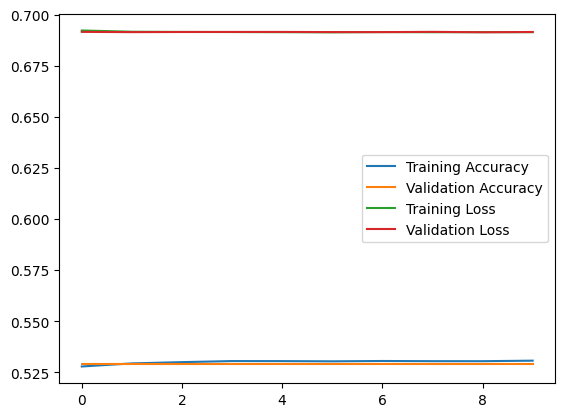

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Predictions: [1 1 1 1 1]
True Classes: [0 0 0 1 0]


In [1]:
import pandas as pd
import numpy as np


# Load the dataset
file_path = 'indexData_processed_before_calculation.csv'

df = pd.read_csv(file_path)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load your dataset (replace with your file or DataFrame)
data  = pd.read_csv(file_path)


# Ensure your dataset has the required columns
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']
target = 'Close'

# Create a binary target variable (1: Increase, 0: Decrease)
data['Target'] = (data['Close'].shift(-1) > data['Close']).astype(int)
data = data.dropna()  # Remove rows with NaN values

# Extract features and target
X = data[features].values
y = data['Target'].values

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create sequences
SEQ_LENGTH = 50  # Number of days in each sequence
X_seq, y_seq = [], []

for i in range(len(X) - SEQ_LENGTH):
    X_seq.append(X[i:i+SEQ_LENGTH])
    y_seq.append(y[i+SEQ_LENGTH])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# Convert y to categorical (for binary classification)
y_seq = to_categorical(y_seq, num_classes=2)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}, Validation shape: {X_val.shape}")

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_seq.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='tanh'),
    Dropout(0.2),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Adjust epochs as needed
    batch_size=64,
    verbose=1
)

# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Predict on a new batch of data
predictions = model.predict(X_val[:5])
predicted_classes = np.argmax(predictions, axis=1)

print(f"Predictions: {predicted_classes}")
print(f"True Classes: {np.argmax(y_val[:5], axis=1)}")